In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
path = Path('/kaggle/input/agriculture-crop-images/kag2/')

In [4]:
fns = get_image_files(path)


In [5]:
failed = verify_images(fns)


In [6]:
failed.map(Path.unlink)

(#0) []

In [7]:
crops = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [8]:
crops = crops.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms())
dls = crops.dataloaders(path)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(6)
learn.freeze()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.176247,1.010115,0.631250,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.172068,0.538360,0.806250,00:03
1,0.961790,0.209724,0.931250,00:03
2,0.751210,0.073815,0.987500,00:03
3,0.594385,0.045368,0.987500,00:03
4,0.480790,0.033064,0.993750,00:03
5,0.407898,0.035838,0.993750,00:03


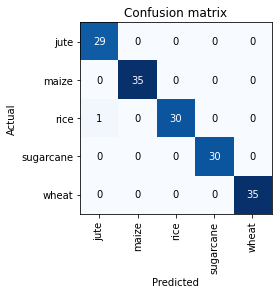

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

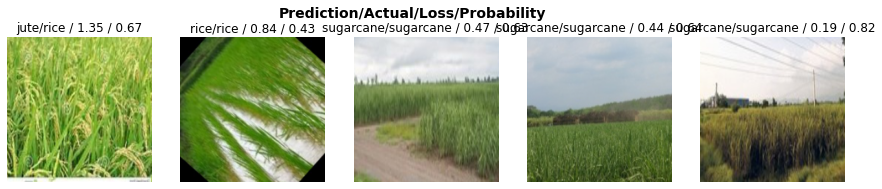

In [11]:
interp.plot_top_losses(5, nrows=1)

In [12]:
learn.export(os.path.abspath('./my_export.pkl'))

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('my_export.pkl')]

In [14]:
learn_inf = load_learner(path/'my_export.pkl')

In [15]:
learn_inf.predict('/kaggle/input/agriculture-crop-images/test_crop_image/wheat-crop.jpg')

('wheat',
 tensor(4),
 tensor([4.1761e-04, 8.7409e-02, 5.9089e-03, 2.0285e-05, 9.0624e-01]))

In [27]:
learn_inf.dls.vocab

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [9]:
btn_upload = widgets.FileUpload()


In [8]:
img = PILImage.create(btn_upload.data[-1])


NameError: name 'btn_upload' is not defined

In [6]:
out_pl = widgets.Output()

In [5]:
lbl_pred = widgets.Label()


In [3]:
btn_run = widgets.Button(description='Classify')


In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()


In [7]:
VBox([widgets.Label('Select a crop'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: name 'btn_upload' is not defined